In [35]:
import netprocess
from netprocess import Network, NetworkProcess, games
import jax
from jax import numpy as jnp
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [38]:
def plot(records, game):
    plt.figure(figsize=(16, 10))
    for p, a, c in [(0,0,'r'), (0,1,'y'), (1,0,'b'), (1,1,'c')]:
        plt.plot(records["step"], records["node._action_probabilities"][:, p,a], c, label=f"Player {p} action {game.action_set[a]} immediate")
        plt.plot(records["step"], records["node._empirical_strategy"][:, p,a], f"{c}--", label=f"Player {p} action {game.action_set[a]} empirical")
    plt.legend(loc='lower right')
    plt.title(f"Probabilities of player actions over time in {game}")

## Game of matching pennies

dict_keys(['node._action_payoffs', 'node._action_probabilities', 'node._current_regrets', 'node._empirical_strategy', 'node.action', 'node.action_counterfactual_payoffs', 'step'])


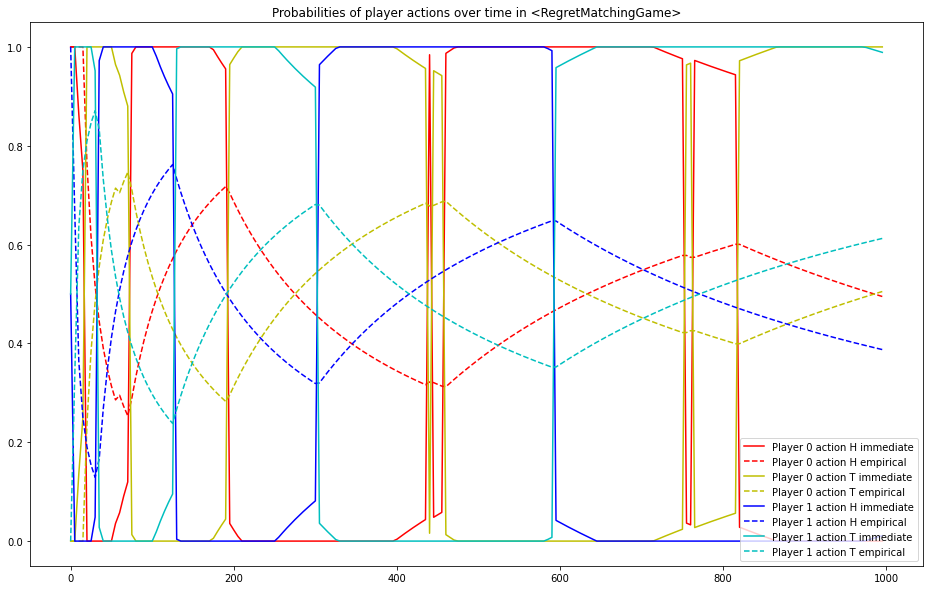

In [69]:
matching_pennies_payoff = np.array([[[1,0],[0,1]],[[0,1],[1,0]]], dtype=np.float32)
game = games.RegretMatchingGame(["H", "T"], matching_pennies_payoff, mu=2.0)
assert (game.get_payoff(0, 0, slice(None)) == np.array([1.0, 0.0])).all()
assert (game.get_payoff(0, 1, slice(None)) == np.array([0.0, 1.0])).all()
assert (game.get_payoff(1, 0, slice(None)) == np.array([0.0, 1.0])).all()
assert (game.get_payoff(1, 1, slice(None)) == np.array([1.0, 0.0])).all()

proc = NetworkProcess([game], record_keys=[
    "node._action_probabilities", "node.action", "node._current_regrets", "step",
    "node.action_counterfactual_payoffs", "node._action_payoffs", "node._empirical_strategy"])
net = Network.from_edges(2, np.array([[0,1]]), True)

s0 = proc.new_state(net, {"node.next_action": [0,0]}, record_stride=5, seed=11)
s = proc.run(s0, 1000)
records = s.records.all_records()
print(records.keys())
plot(records, game)

## Game of chicken

dict_keys(['node._action_payoffs', 'node._action_probabilities', 'node._current_regrets', 'node._empirical_strategy', 'node.action', 'node.action_counterfactual_payoffs', 'step'])


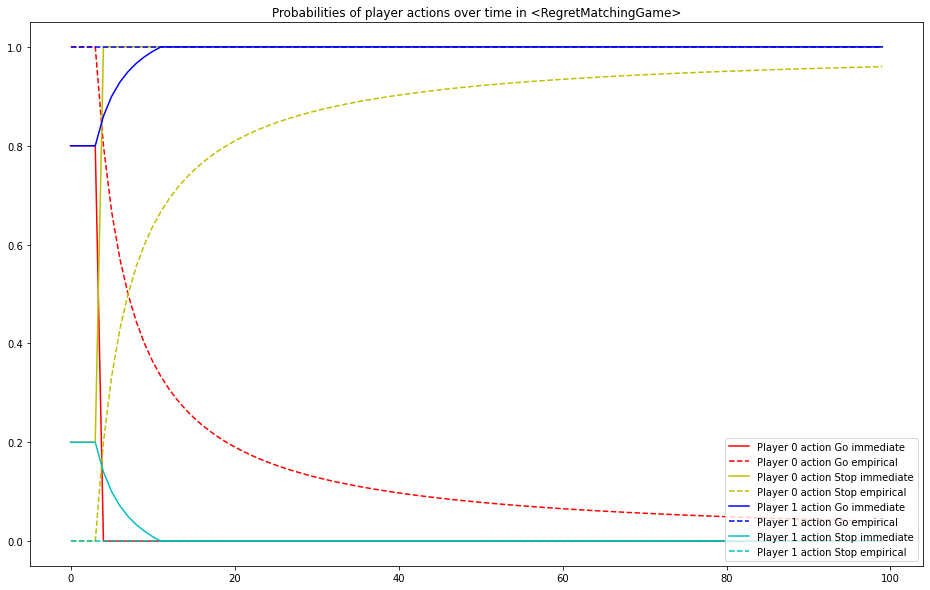

In [68]:
chicken_payoff = np.array([[[-5,-5],[2,-1]],[[-1,2],[0,0]]], dtype=np.float32)
game = games.RegretMatchingGame(["Go", "Stop"], chicken_payoff, mu=20.0)
proc = NetworkProcess([game], record_keys=[
    "node._action_probabilities", "node.action", "node._current_regrets", "step",
    "node.action_counterfactual_payoffs", "node._action_payoffs", "node._empirical_strategy"])
net = Network.from_edges(2, np.array([[0,1]]), True)

s0 = proc.new_state(net, {"node.next_action": [0,0]}, record_stride=1, seed=17)
s = proc.run(s0, 100)
records = s.records.all_records()
print(records.keys())
plot(records, game)